
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

-  The predicted values can take only two possibilities : . 
    

   Yes, 1, for students who need early intervention.<br>
   No, 0, for students who do not need early intervention.
 - So this problem is a classification problem.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [2]:
# Read student data
data=pd.read_csv('student-data.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [4]:
# Calculate number of students
n_students = data.shape[0]

In [5]:
# Calculate number of features
n_features = len(data.columns.values)

In [6]:
# Calculate passing students
n_passed = len(data[data.passed=='yes'])

In [7]:
# Calculate failing students
n_failed = len(data.loc[data['passed']=='no'])

In [8]:
# Calculate graduation rate
grad_rate = float(n_passed)/float(n_students)*100

In [9]:
# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [39]:
# Extract feature columns
feature=data.iloc[:,:30]

In [12]:
# Extract target column 'passed'

In [13]:
target =data['passed']

In [14]:
# Separate the data into feature data and target data (X and y, respectively)

In [15]:
X=data.drop(['passed'],axis=1)
y=data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [18]:
X=pd.get_dummies(X)
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes'], dtype='object')

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [20]:
# splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=95)

In [21]:
# Show the results of the split
print(" shape of x train",X_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",X_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (300, 56)
 shape of y train (300,)
 shape of x test (95, 56)
 shape of y test (95,)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [22]:
#explaination

**3 Models**<br>
1.Logistic Regression<br>
2.k-Nearest Neighbor<br>
3.RANDOM FOREST

1.**Logistic Regression**
- Applications :
  - Classification of protein sequences, 
  - Cancer prediction based on patient characteristics
- Strengths :               
  - low computational requirements for predictions, 
  - performs reasonably well on both small and large datasets                          
  - Logistic regression is simple ,fast and efficient.  
- Weakness :  
  - Models can have high bias and may require larger datasets to stabilize predictions. 
  - They are not flexible enough to naturally capture more complex relationships.  
- Why chosen :
   - Many features may be correlated, dataset having many features so algorithm can be regularized to avoid overfitting  ,LR provides a baseline for any machine learning problem,it performs best when the data is linearly separable

2.**k-Nearest Neighbor**
- Applications : 
     - Gene Expression 
     - Predicting stock price change
     - Automatic text classification
- Strengths : 
    - Low training times
    - Memory based reasoning
    - Simplest and yet effective
    - Ease to interpret output
    - Calculation time
- Weakness : 
  - Results may change over time as the algorithim is query based
  - It is instance-based and lazy learning. It is sensitive to the local structure of the data
  - Before training KNN we have to make a decision concerning the number of the nearest neighbours has to be made
- Why chosen :
   - We have properly labeled data.Small dataset.it makes highly accurate predictions  
3.**RANDOM FOREST**
- Applications : 
  - Credit Card Fraud Detection
  - Diabetes Prediction
  - Stock Market Prediction
- Strengths : 
    -  Very good at handling categorical features, since it doesn't expect linear features. 
    - Very fast to train.
    - It gives a higher accuracy through cross validation.
    - can handle the missing values and maintain the accuracy of a large proportion of data.
    - If there are more trees, it doesn’t allow over-fitting trees in the model.
    - It has the ability to work upon a large data set with higher dimensionality.
- Weakness : 
    - Slow to create predictions once trained. 
    - Less accurate than Boosting. 
    - take up significant amount of time compared to their counterparts since it builds multiple classifiers.Therefore they require parallelization.
- Why chosen : 
  - Random forests are very good and often used in classification problems. Also they're very good at evading overfitting. We also have lots of categorical features in our dataset, an input that the Random Forest is made to handle

In [23]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
# fit model-1  on traning data 

In [25]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# predict on the test data 

In [27]:
y_pred=logit_model.predict(X_test)

In [28]:
# calculate the accuracy score

In [29]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.7157894736842105


In [30]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [31]:
acc_values=[]
neighbors =np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)    

Text(0, 0.5, 'accuracy')

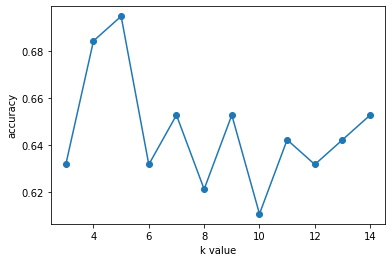

In [32]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [33]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.6947368421052632


In [34]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [42]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.6842105263157895


Conclusion:<br>
Logistic Regression is the best model among the 3 models

`submitted by -
(Group  11)
Shilpa Shibu
Sreelekshmi M K
Roopa Thomas
Kevin M`